In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

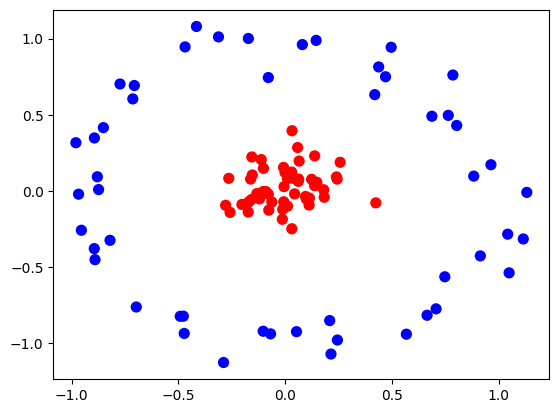

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.35

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

/var/folders/b5/037wx_rd5m53vrp56k8tznf00000gn/T/ipykernel_5573/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


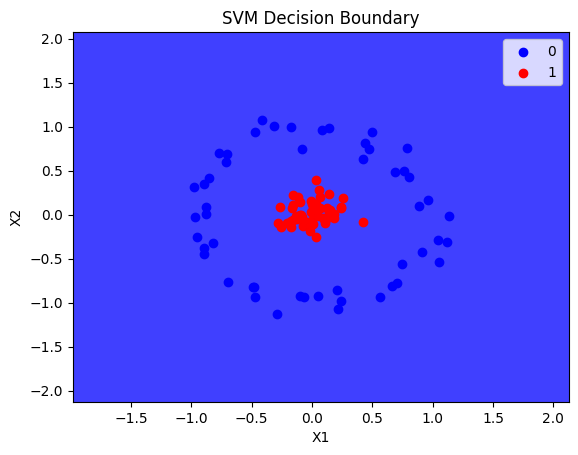

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

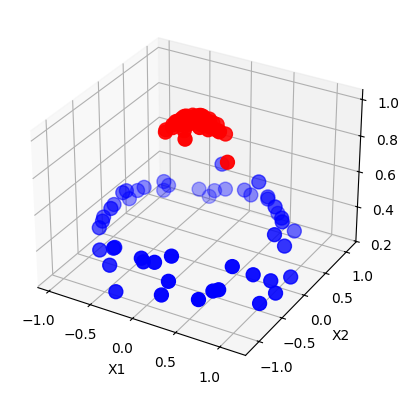

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

/var/folders/b5/037wx_rd5m53vrp56k8tznf00000gn/T/ipykernel_5573/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


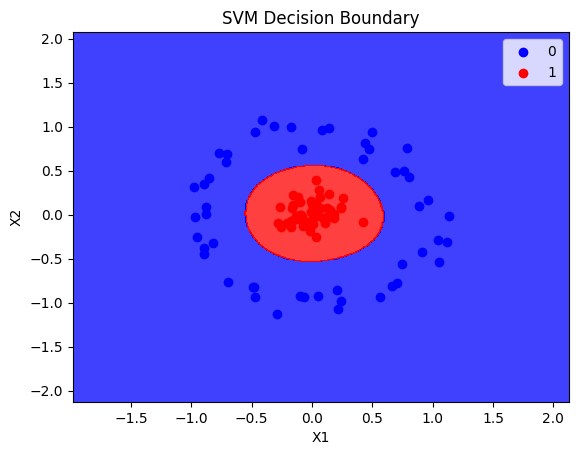

In [11]:
plot_decision_boundary(X, y, rbf_classifier)

In [12]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

1.0

/var/folders/b5/037wx_rd5m53vrp56k8tznf00000gn/T/ipykernel_5573/3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


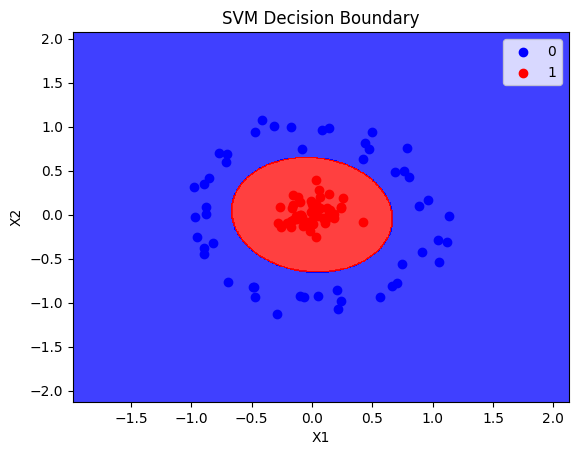

In [13]:
plot_decision_boundary(X, y, poly_classifier)

In [180]:
X

array([[ 0.39896842,  1.16747207],
       [ 0.36174994,  0.16028343],
       [-0.01280271, -0.1227449 ],
       [-0.91697399,  0.28284427],
       [ 0.10959615, -0.89264008],
       [ 0.23023935,  0.02235324],
       [-0.04124462, -0.02506236],
       [-0.04227921, -0.20651006],
       [ 0.35957795,  0.95449362],
       [ 0.82413796, -0.50526127],
       [ 0.98105034, -0.14023386],
       [ 0.88251666,  0.5295689 ],
       [ 0.03693396, -0.10528597],
       [-0.51177477, -0.78506493],
       [ 0.04697092, -0.23392657],
       [-0.08206585, -0.04615685],
       [ 0.0359025 ,  0.09810491],
       [ 0.26770521,  0.28702445],
       [-1.02190094,  0.01891189],
       [ 0.66685164,  0.62375836],
       [-0.16285115, -0.31172126],
       [-0.21602558, -0.02210426],
       [-0.02330554,  0.92783582],
       [-0.07078896,  0.82481082],
       [ 0.00344906, -0.05740011],
       [-0.02202348,  0.14869388],
       [-0.22084022,  1.0254179 ],
       [-0.19711251,  0.98327735],
       [-0.51437148,

In [31]:
np.exp(-(X**2)).sum(1)

array([1.92474932, 1.30551477, 1.33451789, 1.11434663, 1.86888988,
       1.98209455, 1.27142264, 1.98017671, 1.99475996, 1.99266903,
       1.28108279, 1.30240161, 1.99110906, 1.96821791, 1.31703694,
       1.45586193, 1.95382544, 1.9217843 , 1.11942537, 1.9864715 ,
       1.25504359, 1.99837501, 1.1979308 , 1.22525191, 1.34254909,
       1.98098055, 1.94943117, 1.98110864, 1.11397757, 1.99324997,
       1.36864613, 1.97056757, 1.14157194, 1.11728861, 1.40161855,
       1.98398902, 1.20677455, 1.97189796, 1.99367818, 1.06387675,
       1.24779089, 1.98773366, 1.34377658, 1.99739375, 1.32529426,
       1.99394329, 1.96003133, 1.29386874, 1.97858885, 1.99342189,
       1.97290436, 1.40233646, 1.97609461, 1.97574809, 1.99639779,
       1.43533448, 1.9975871 , 1.2242329 , 1.98872888, 1.96023923,
       1.99836278, 1.9471979 , 1.31844817, 1.96147996, 1.97112125,
       1.2400487 , 1.2699872 , 1.95487084, 1.97444787, 1.06373879,
       1.91515465, 1.47988897, 1.40218898, 1.99439689, 1.26409

In [15]:
X_new=np.exp(-(X**2))

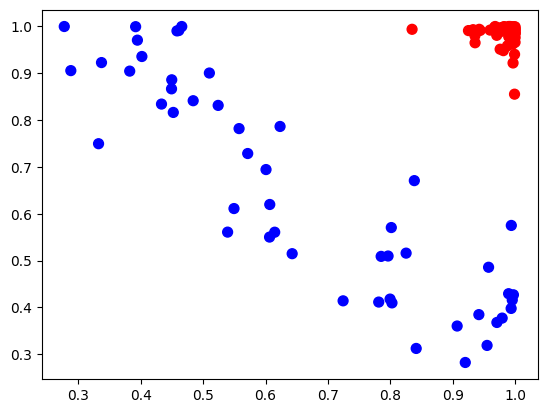

In [16]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')